# MHS Energy analysis of data from EnergySparks
## Reminder. Delete partially complete months from .csv file

In [256]:
# Import key librarys

import pandas as pd
import numpy as np
from functools import reduce

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [257]:
# Read in .csv file

df = pd.read_csv('meter-amr-readings-1712394274050.csv')

# Dataframe shape

df.head()

,Reading Date,One Day Total kWh,Status,Substitute Date,00:30,01:00,01:30,02:00,02:30,03:00,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,00:00
0,2019-09-02,804.9,ORIG,NaN,14.5,11.9,8.8,8.5,8.2,12.3,...,10.6,21.7,11.2,11.4,12.2,25.7,19.9,18.1,15.2,14.3
1,2019-09-03,701.9,ORIG,NaN,13.6,17.5,13.8,12.7,11.3,11.6,...,11.8,12.1,8.7,9.8,9.2,18.6,17.6,13.0,16.3,12.8
2,2019-09-04,817.3,ORIG,NaN,14.5,13.0,11.9,10.9,8.3,9.6,...,19.9,20.9,14.3,11.9,16.4,26.0,23.9,20.8,23.1,21.7
3,2019-09-05,955.2,ORIG,NaN,19.9,20.5,19.8,17.3,14.4,14.7,...,13.8,11.4,7.4,8.1,10.1,22.3,19.9,21.8,17.7,15.9
4,2019-09-06,826.4,ORIG,NaN,18.2,15.6,11.0,9.1,10.3,13.8,...,16.3,13.1,9.9,7.9,8.1,22.6,20.0,16.1,17.7,15.5


In [258]:
# Add up rows

#total = df.iloc[:, 4:52].sum(axis=1)
#print(total)

In [259]:
# Convert Reading Date to Datetime

df['Reading Date'] = pd.to_datetime(df['Reading Date'])

### Useage per week

In [260]:
# Resample by week

psw = df.resample('W', on='Reading Date')['One Day Total kWh'].sum()

# Turn resample series into df

dfw = pd.DataFrame((list(zip(psw.index, psw))), columns =['Week', 'Total kWh'])

# Tidy up week names

dfw['Week'] = dfw['Week'].dt.date

dfw.head()

,Week,Total kWh
0,2019-09-08,5140.1
1,2019-09-15,5032.6
2,2019-09-22,5708.3
3,2019-09-29,4589.4
4,2019-10-06,5642.3


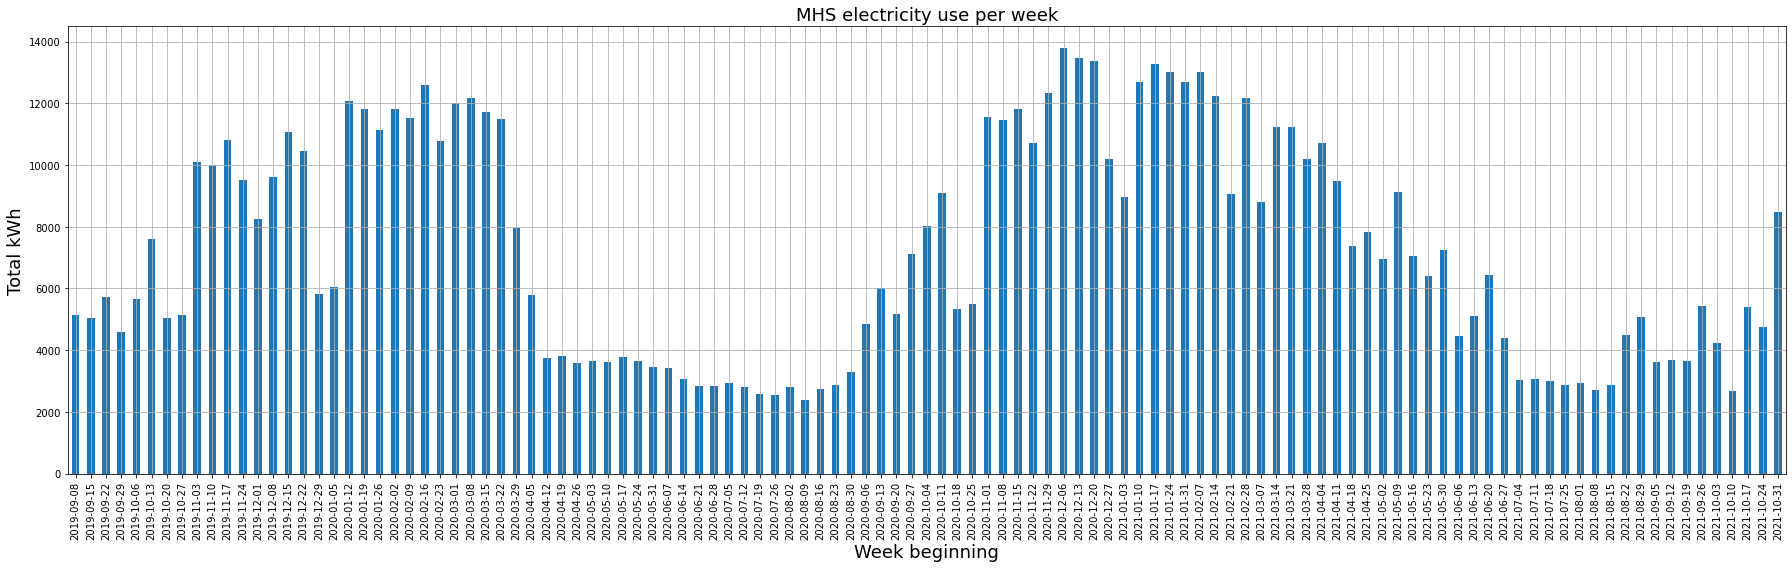

In [261]:
# Plot bar chart

dfw.plot.bar(x='Week', y='Total kWh', figsize=(25,8), grid = True, legend=False)

plt.title("MHS electricity use per week", fontsize=18)
plt.xlabel("Week beginning", fontsize=18)
plt.ylabel("Total kWh", fontsize=18)

plt.tight_layout()

plt.savefig('mhs_kWh_per_week.jpg', dpi = 200)

### Useage and cost per month

In [262]:
# Resample by month

psm = df.resample('M', on='Reading Date')['One Day Total kWh'].sum()

# Turn resample series into df

dfm = pd.DataFrame((list(zip(psm.index, psm))), columns =['Month', 'Total kWh'])

# Tidy up month names

dfm['Month'] = dfm['Month'].dt.month_name() + ' ' + dfm['Month'].dt.year.astype(str)

# Add in rough cost

dfm["Approx Cost"] = dfm["Total kWh"] * 0.15

dfm.head()

,Month,Total kWh,Approx Cost
0,September 2019,21196.2,3179.430
1,October 2019,28403.1,4260.465
2,November 2019,42019.6,6302.940
3,December 2019,39472.3,5920.845
4,January 2020,48837.4,7325.610


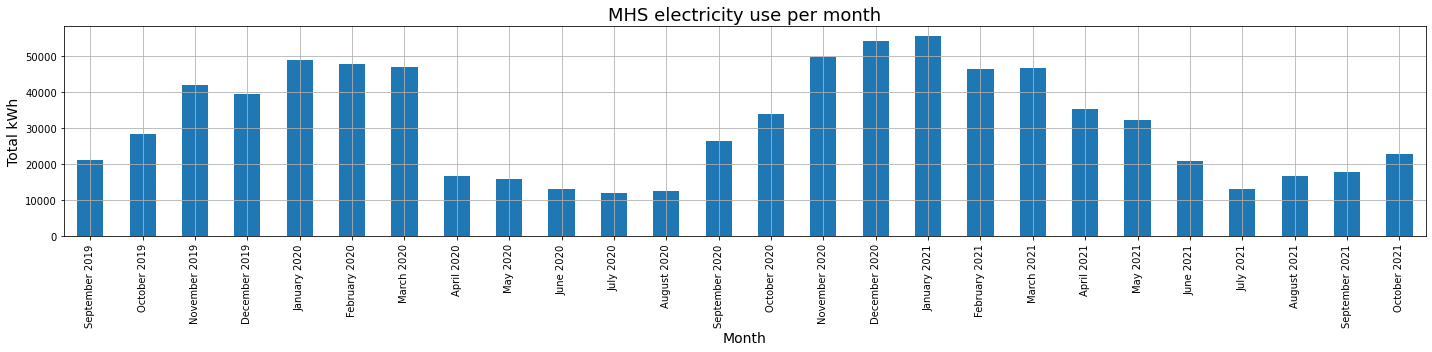

In [263]:
# Plot graph

dfm.plot.bar(x='Month', y='Total kWh', figsize=(20,5), grid = True, legend=False)

plt.title("MHS electricity use per month", fontsize=18)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total kWh", fontsize=14)

plt.tight_layout()

plt.savefig('mhs_kWh_per_month.jpg', dpi = 300)

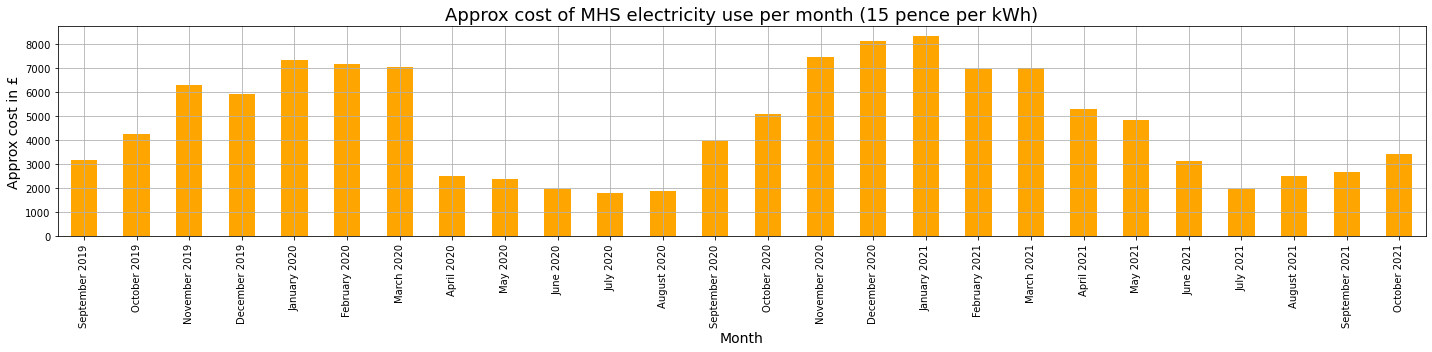

In [264]:
# Plot graph

dfm.plot.bar(x='Month', y='Approx Cost', figsize=(20,5), grid = True, legend=False, color='orange')

plt.title("Approx cost of MHS electricity use per month (15 pence per kWh)", fontsize=18)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Approx cost in £", fontsize=14)

plt.tight_layout()

plt.savefig('mhs_£_per_month.jpg', dpi = 300)

### Graph of useage over 24 hrs for each month

In [246]:
# Drop rows with substitute date columns (these values left in for now)
# dftest = df[df.Status == "ORIG"]

# Replace zeros with NaN  (these values left in for now)
#dfttest.replace(0, np.nan)

In [253]:
# Set year

year = 2021

# Resample by month and find mean values 
# (this also drops status and substitute date columns as without numeric values)

pst = df.resample('M', on='Reading Date').mean()

dft = pd.DataFrame(pst)

# Replace index with 0, 1, 2, 3, ..

dft.reset_index(level=0, inplace=True)

# Remove One Day Total kWh column

dft = dft.drop('One Day Total kWh', 1)

# Remove last column (lots of dodgy zeros in 00:00 column)

dft = dft.drop('00:00', 1)

# Look only at 2020 and change names to months

dft = dft[dft['Reading Date'].dt.year == year]

# Change names to months

dft['Reading Date'] = dft['Reading Date'].dt.month_name()

dft.head()

,Reading Date,00:30,01:00,01:30,02:00,02:30,03:00,03:30,04:00,04:30,...,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30
16,January,77.700000,74.029032,68.880645,61.316129,56.970968,54.254839,48.338710,46.316129,45.829032,...,20.696774,21.187097,21.148387,21.254839,30.887097,34.277419,61.419355,86.464516,95.461290,91.948387
17,February,70.832143,67.989286,62.850000,58.185714,54.014286,48.917857,49.017857,45.135714,43.853571,...,16.617857,17.817857,32.414286,33.350000,37.153571,41.235714,52.128571,84.235714,80.789286,80.632143
18,March,64.212903,57.616129,53.370968,46.851613,45.212903,43.670968,43.525806,40.851613,38.716129,...,15.029032,14.935484,16.461290,32.190323,39.435484,38.661290,40.222581,82.383871,74.558065,74.487097
19,April,49.016667,44.840000,40.756667,35.286667,30.786667,30.956667,30.943333,31.510000,31.490000,...,11.723333,11.940000,11.186667,12.343333,21.796667,30.616667,28.986667,71.383333,63.660000,57.283333
20,May,42.896774,39.196774,35.761290,29.722581,27.383871,26.238710,26.354839,26.438710,26.112903,...,11.280645,11.012903,11.454839,10.945161,11.451613,16.338710,26.067742,55.574194,61.603226,53.593548


In [254]:
# Set index back to Reading Date for graph

dft.set_index('Reading Date',inplace=True)

# Transpose dateframe for graph

dft_trans = dft.T

dft_trans.head()

Reading Date,January,February,March,April,May,June,July,August,September,October
00:30,77.700000,70.832143,64.212903,49.016667,42.896774,21.233333,16.412903,21.716129,22.980000,33.264516
01:00,74.029032,67.989286,57.616129,44.840000,39.196774,19.406667,15.696774,18.993548,21.196667,33.303226
01:30,68.880645,62.850000,53.370968,40.756667,35.761290,17.300000,12.861290,17.687097,20.210000,26.435484
02:00,61.316129,58.185714,46.851613,35.286667,29.722581,16.636667,13.309677,16.164516,17.416667,25.058065
02:30,56.970968,54.014286,45.212903,30.786667,27.383871,15.476667,10.283871,16.222581,18.313333,22.725806


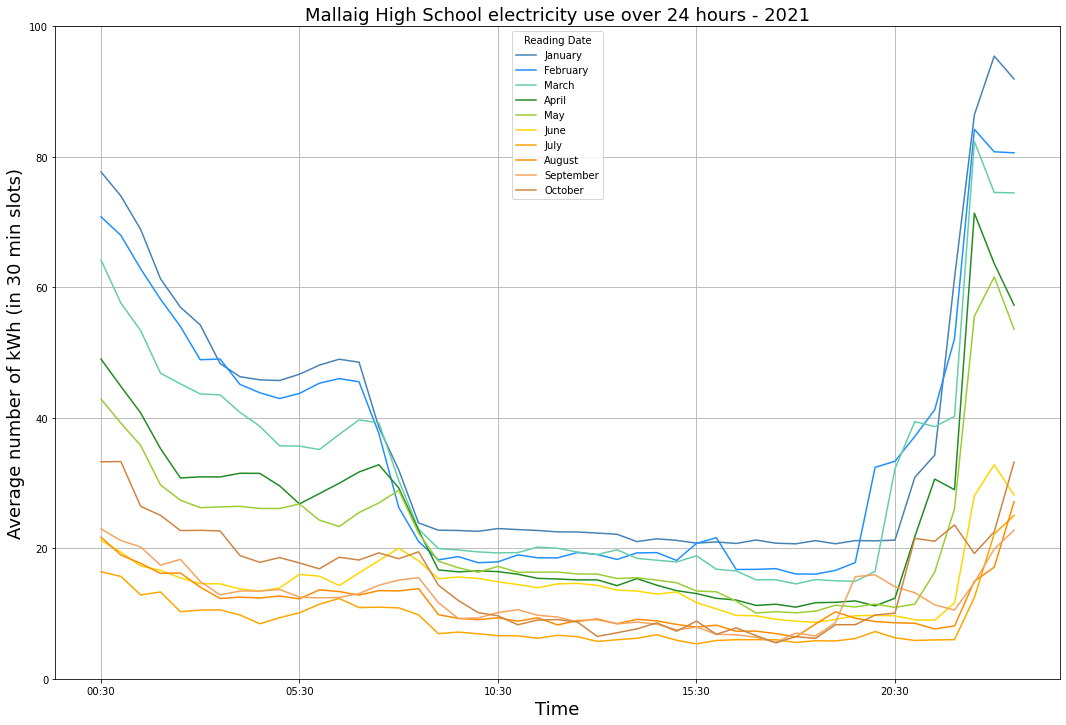

In [255]:
# Plot line graph

# Create dictionary of colours for each month

color_dict = {
    'January':'steelblue', 'February':'dodgerblue',
    'March':'mediumaquamarine', 'April':'forestgreen', 'May':'yellowgreen',
    'June':'gold', 'July':'orange', 'August':'darkorange',
    'September':'sandybrown', 'October':'peru', 'November':'saddlebrown',
    'December':'cadetblue'
    }

dft_trans.plot.line(figsize=(18,12), grid = True, ylim=(0,100), color=[color_dict.get(x) for x in dft_trans.columns])

plt.title("Mallaig High School electricity use over 24 hours - " + str(year), fontsize=18)
plt.xlabel("Time", fontsize=18)
plt.ylabel("Average number of kWh (in 30 min slots)", fontsize=18)

plt.savefig('kWh_time_of_day_' + str(year) + '.jpg', dpi = 400)